In [1]:
import os,sys
import pathlib
sys.path.append(os.path.abspath('.'))

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
from astropy.cosmology import FlatLambdaCDM
from scipy.optimize import curve_fit

# Relacion de Tully - Fisher

- Correlaciona los maximos de la velocidad de rotacion de una galaxia (siempre y cuando sea posible obtener estas velocidades, las cuales deben ser radiales) con la luminosidad o magnitud absoluta de la misma.

- Se constituye un indicador de distancia puesto que teniendo la relacion $f(v)$ se puede obtener una magnitud absoluta y si se conoce la magnitud aparente puede conocerse la distancia $d_{l}$

- La relacion existente entre estos parametros es practicamente lineal. De manera que se debe realizar un ajuste lineal para conocerla.

In [3]:
df = pd.read_csv("practico6/giovanelli.dat", delim_whitespace=True)
df2 = df[df["Mcor"]<0]

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df2["log_Wcor"],df2["Mcor"])

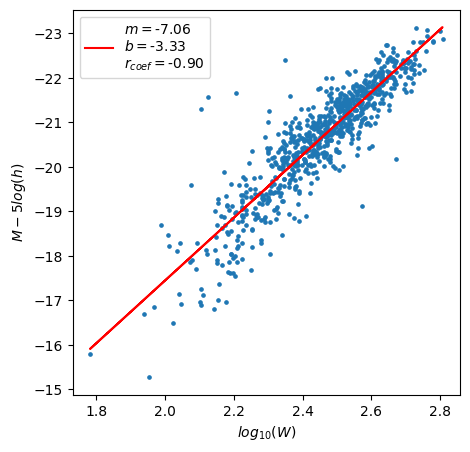

In [4]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

# Scatter plot
ax.scatter(df2["log_Wcor"], df2["Mcor"], s=5.5)
# Linear fit plot
ax.plot(df2["log_Wcor"],slope*df2["log_Wcor"]+intercept, c="red",
        label=r"$m=$"f"{slope:.2f}\n" r"$b=$"f"{intercept:.2f}\n" r"$r_{coef}=$"f"{r_value:.2f}"
        )

ax.set_xlabel(r"$log_{10}(W)$")
ax.set_ylabel(r"$M-5log(h)$")
fig.gca().invert_yaxis()
plt.legend()


Los resultados obtenidos en el paper de Giovanelli son: $(-21.00 \pm 0.02) + (-7.68 \pm 0.13) log_{10}(W - 2.5)$

# Morfologia

morphological type code in the RC3 scheme, where code 1 corresponds to Sa’s, code 3 to
Sb’s, code 5 to Sc’s and so on. When the type code is followed by a “B”, the galaxy disk has an
identifiable bar.

No hay una gran dependencia con la morfologia en la banda I que es donde tenemos los datos.

In [5]:
def linreg(df2):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df2["log_Wcor"],df2["Mcor"])
    return slope,intercept

In [6]:
# 1
df_1 = df2[(df2["T"]=="1B")|(df2["T"]=="1")]
df_3 = df2[(df2["T"]=="3B")|(df2["T"]=="3")]
df_5 = df2[(df2["T"]=="5B")|(df2["T"]=="5")]

s1,i1 = linreg(df_1)
s3,i3 = linreg(df_3)
s5,i5 = linreg(df_5)

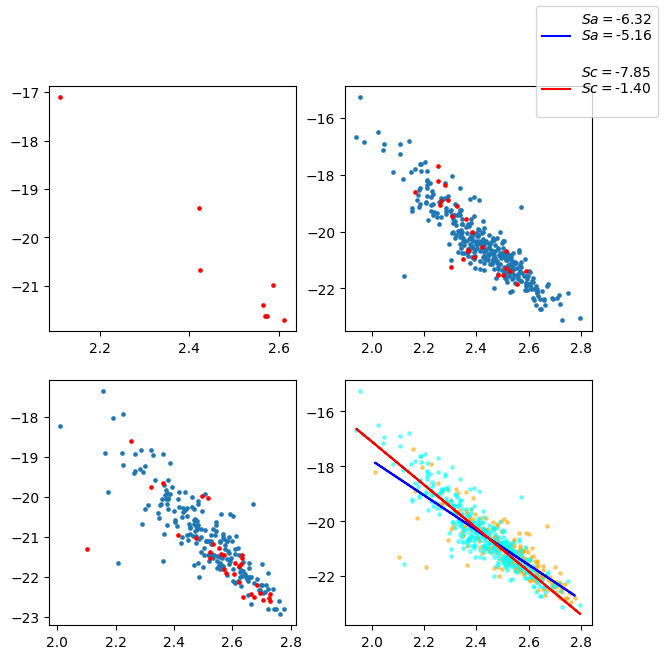

In [7]:
fig,ax = plt.subplots(2,2,figsize=(7,7))
ax[0,0].scatter(df2[df2["T"]=="1"]["log_Wcor"], df2[df2["T"]=='1']["Mcor"],s=5.5, c='red')
ax[0,0].scatter(df2[df2["T"]=="1B"]["log_Wcor"], df2[df2["T"]=='1B']["Mcor"],s=5.5, c='blue')
# ax[0,0].plot(df_1["log_Wcor"],s1*df_1["log_Wcor"]+i1, c='yellow',
#             label=r"$m1=$"f"{s1:.2f}\n" r"$b1=$"f"{i1:.2f}\n"
#              )



ax[1,0].scatter(df2[df2["T"]=='3']["log_Wcor"], df2[df2["T"]=="3"]["Mcor"], s=5.5)
ax[1,0].scatter(df2[df2["T"]=='3B']["log_Wcor"], df2[df2["T"]=="3B"]["Mcor"], s=5.5, c='red')
# ax[1,0].plot(df_3["log_Wcor"],s3*df_3["log_Wcor"]+i3, c='yellow',
#              label=r"$m3=$"f"{s3:.2f}\n" r"$b3=$"f"{i3:.2f}\n"
#              )


ax[0,1].scatter(df2[df2["T"]=="5"]["log_Wcor"], df2[df2["T"]=='5']["Mcor"], s=5.5)
ax[0,1].scatter(df2[df2["T"]=="5B"]["log_Wcor"], df2[df2["T"]=='5B']["Mcor"], s=5.5, c='red')
# ax[0,1].plot(df_5["log_Wcor"],s5*df_5["log_Wcor"]+i5, c='yellow',
#              label=r"$m5=$"f"{s5:.2f}\n" r"$b5=$"f"{i5:.2f}\n"
#              )

ax[1,1].scatter(df_3["log_Wcor"],df_3["Mcor"], s=5.5, c='orange',alpha=0.5)
ax[1,1].scatter(df_5["log_Wcor"],df_5["Mcor"], s=5.5, c='cyan',alpha=0.5)
ax[1,1].plot(df_3["log_Wcor"],s3*df_3["log_Wcor"]+i3, c='blue',
             label=r"$Sa=$"f"{s3:.2f}\n" r"$Sa=$"f"{i3:.2f}\n"
             )
ax[1,1].plot(df_5["log_Wcor"],s5*df_5["log_Wcor"]+i5, c='red',
             label=r"$Sc=$"f"{s5:.2f}\n" r"$Sc=$"f"{i5:.2f}\n"
             )



fig.legend()



# Uso de la velocidad como indicador de distancia:

- Considere una galaxia con $W=167 \frac{km}{s}$
- Considere que la misma galaxia tiene $m=14.51$
- Determine la magnitud absoluta y su distancia.

Tenga en cuenta la relacion distancia luminosidad:
$$5 log_{10}(\frac{d_{L}}{1[Mpc]}) = m - M -25$$

$$d_{L} = 10^{(\frac{m-M-25}{5})}$$

Como, mi relacion obtenida fue: $m=-7.06[s km_{-1}]$ y $b=-3.33$, entonces: 
$$M = -7.06 log_{10}(W)-3.33$$

Obtendria finalmente:
$$d_{L} = 10^{(\frac{m-[-7.06 log_{10}(W)-3.33]-25}{5})}$$

# Verifica tu resultado aca:
https://ned.ipac.caltech.edu/byname?objname=UGC+00553&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1

In [8]:
# Calculo:
def dl(m,w,s1,i1):
    dl = 10**((m - (s1*np.log10(w)+i1)-25)/5)
    return dl

def mabs(s1,i1,w):
    return s1*np.log10(w)+i1

In [9]:
mabs(-7.06,-3.33,167)
dl(14.51,167,-7.06,-3.33)

50.87163046712787

# Segunda parte del paper

- Sugerencia: Muchos de los plots que se piden estan en el paper.
- En cuanto a la informacion:
    - Banda R : Esta anotada como Btot
    - A2 : Correccion por extincion
    - k2 : Correccion K

Con esto podremos calcular la magnitud $M_{r}$

# Segunda Parte

- Catalogos EFAR: <a href="https://vizier.cds.unistra.fr/viz-bin/VizieR-2">Vizier</a>
- Catalogo 1: <a href="https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/MNRAS/292/499/table4">Saglia</a>
- Catalogo 2: <a href="https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/MNRAS/305/259/table5&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa">Wegner</a>

- Informacion sobre el catalogo de Wegner: <a href="https://cdsarc.cds.unistra.fr/viz-bin/ReadMe/J/MNRAS/305/259?format=html&tex=true">Link</a>

<table>
  <tr>
    <th>Label</th>
    <th>Unit</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>GIN</td>
    <td>---</td>
    <td>Galaxy identification number</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>---</td>
    <td>Galaxy name</td>
  </tr>
  <tr>
    <td>CAN</td>
    <td>---</td>
    <td>Cluster assignment number</td>
  </tr>
  <tr>
    <td>cz</td>
    <td>km/s</td>
    <td>Redshift (combined estimate)</td>
  </tr>
  <tr>
    <td>e</td>
    <td>---</td>
    <td>Not Sure</td>
  </tr>
  <tr>
    <td>sigma</td>
    <td>---</td>
    <td>Not Sure</td>
  </tr>
    <tr>
    <td>e</td>
    <td>---</td>
    <td>Not Sure</td>
  </tr>
  <tr>
    <td>dsigma</td>
    <td>---</td>
    <td>Not Sure</td>
  </tr>
</table>

## Parametros del catalogo de Saglia

<table>
  <tr>
    <th>Label</th>
    <th>Unit</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>GIN</td>
    <td>---</td>
    <td>Galaxy identification number</td>
  </tr>
  <tr>
    <td>Btot</td>
    <td>---</td>
    <td>Total luminosity in R</td>
  </tr>
  <tr>
    <td>< SBe ></td>
    <td>mag/arcsec+2</td>
    <td>Average effective surface brightness in Rmag/arcsec2</td>
  </tr>
  <tr>
    <td>Dn</td>
    <td>arcsec</td>
    <td>Diameter of the galaxy </td>
  </tr>
  <tr>
    <td>AR</td>
    <td>mag</td>
    <td>R-band Galactic absorption</td>
  </tr>
  <tr>
    <td>KR</td>
    <td>mag</td>
    <td>R-band K correction</td>
  </tr>
  <tr>
    <td>Re</td>
    <td> arcsec</td>
    <td>Half-luminosity radius</td>
  </tr>

</table>

# Practico

1) Correlacionar los catalogos de Saglia y Wegner. Para correlacionarlos hay que utilizar el indice GIN que se encuentra en ambos catalogos

In [10]:
saglia = pd.read_csv("./practico6/saglia2.dat", delim_whitespace=True, header=0)
wegner = pd.read_csv("./practico6/Wegner.dat", delim_whitespace=True, header=0)
# Ahora genero un nuevo catalogo, juntando los dos anteriores, con los valores de GIN que coincidan en ambos catalogos
df = pd.merge(saglia,wegner,on="GIN", how="left")

# Agrego estas columnas para facilitarme los plots con Seaborn
df["log_dn"] = np.log10(df['Dn'])
df["log_re"] = np.log10(df['Re'])


2) Realizar las distribuciones de $log(D_{n})$, $log(R_{e})$, $R_{tot}$ y $<SB_{e}>$

<Axes: xlabel='<SBe>', ylabel='Count'>

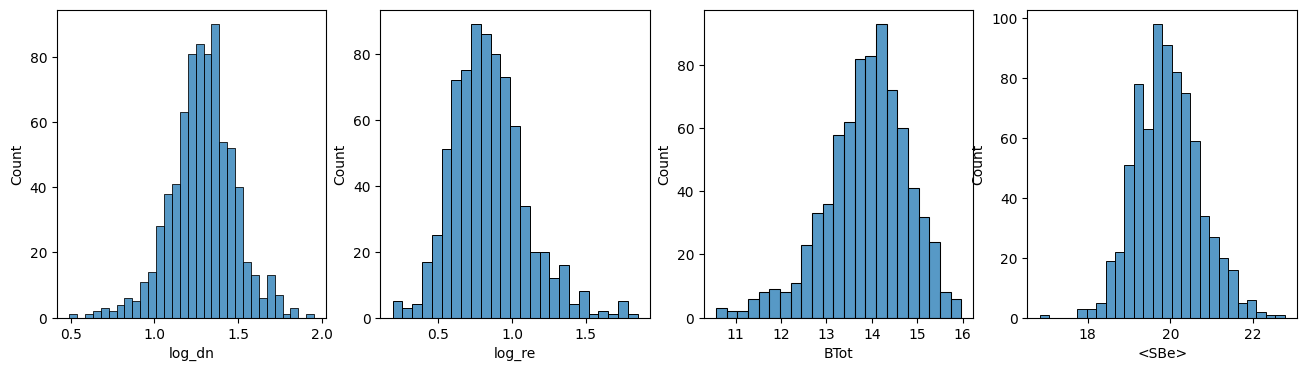

In [11]:
fig,ax = plt.subplots(1,4,figsize=(16,4))
sns.histplot(data=df,x="log_dn",ax=ax[0])
sns.histplot(data=df,x="log_re",ax=ax[1])
sns.histplot(data=df,x="BTot",ax=ax[2])
sns.histplot(data=df,x="<SBe>",ax=ax[3])

3) Realizar las distribuciones de $\sigma$ y velocidad

<div style="color:red;">Pregunta</div> : A que se refiere con velocidad?

<Axes: xlabel='sigma', ylabel='Count'>

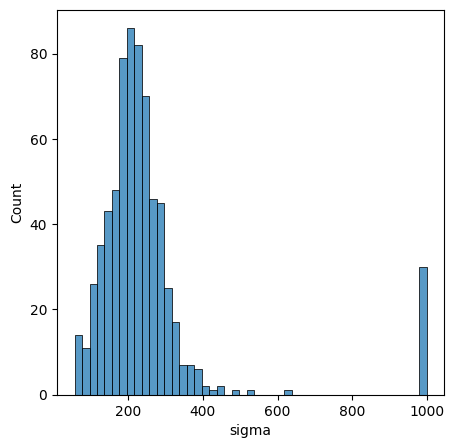

In [12]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
sns.histplot(data=df,x="sigma",ax=ax)

In [ ]:
df['sigma'].describe() # Eliminar los valors de 999

count    684.000000
mean     251.052632
std      174.721280
min       57.000000
25%      176.000000
50%      218.000000
75%      265.250000
max      999.000000
Name: sigma, dtype: float64

3) Convertir Btot a magnitud absoluta.

- Tener en cuenta que para hacer la distribucion de $R_{tot}$ tenemos primero que hacer la correccion K y tambien corregir por extincion.
- Para hacer la correccion hacemos como en este paper (ecuacion 11) (Shen, Shiyin, et al. "The size distribution of galaxies in the Sloan Digital Sky Survey." ) - Solo que utilizo 25 para tener la distancia en Megaparsecs.
$$ M = m - 5log_{10}(d_{L,Mpc}) -25 + KR + AR$$

- Para las cantidades en arcosegundo --> kpc: 
$$\alpha[kpc] = \frac{(dn/re)*\pi*d_{a}*1000}{180*3600}$$

- Los parametros a utilizar para la cosmologia son: $H_{0}=100 km s^{-1} Mpc^{-1}$

In [13]:
# Defino una funcion que me haga la transformacion anterior
def dl_da_(df):
    z = df['cz']/300000
    cosmo = FlatLambdaCDM(H0=100, Om0=0.3)
    dl = cosmo.comoving_distance(z).value
    da = (cosmo.angular_diameter_distance(z).value)*1000/3600
    r = df['BTot'] - 5*np.log10(dl) - 25 + df['KR'] + df['AR']
    dn = (np.pi/180)*da*df['Dn']
    re = (np.pi/180)*da*df['Re']
    return r,dn,re


In [28]:
r,dn,re = dl_da_(df) # calculo las transformaciones
# Agrego nuevas columnas al dataframe

df['r'] =r
df['log_dn']=np.log10(dn)
df['log_re']=np.log10(re)
df['log_dn_re']=np.log10(dn)/np.log10(re)
df['log_dn_re_deg']=np.log10(dn/re)
df['log_sigma'] = np.log10(df['sigma'])
df['log_re_s2'] = np.log10(re*df['sigma']**2)

df = df[df['log_dn_re']<50]

3.1 Graficar magnitud absoluta vs redshift

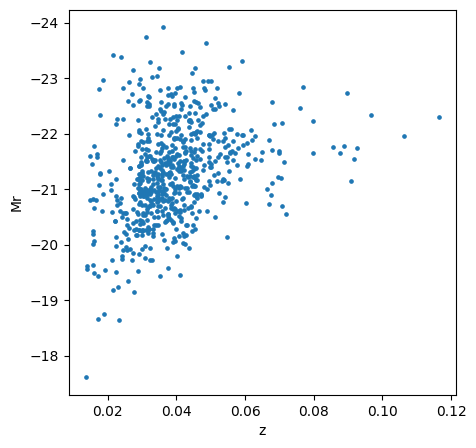

In [76]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(df['cz']/300000,r,s=5.5)
ax.set_xlabel("z")
ax.set_ylabel("Mr")
ax.invert_yaxis()

4) Graficar y realizar el ajuste cuando sea necesario

- $log(R_{e})$ vs $<SB_{e}>$ Distinguir tipos, tempranas y tardias
- $log(D_{n}/R_{e})$ vs $<SB_{e}>$ Para tipos tardios

In [15]:
# Estos son los tipos de galaxias:
df['Type'].unique()

# Tardias: ['S', 'SB0', 'SB']
# Tempranas: ['cD', 'E/S0', 'E']
# No tengo idea: ['tcD', 'DB']

array(['cD', 'E/S0', 'S', 'E', 'SB0', 'tcD', 'SB', 'DB'], dtype=object)

In [16]:
def linearfitter(df,x,y):
    """
    Parameters
    ----------
        df: DataFrame
        x:str
            A dataframe Property
        y:str
            A dataframe Property
    Returns
    -------
        slope and intercept of the fit
    """
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x],df[y])
    return slope,intercept

In [29]:
df_s = df[df['Type'].isin(['S', 'SB0', 'SB'])]
df_e = df[df['Type'].isin(['cD', 'E/S0', 'E'])]

slope_s,int_s = linearfitter(df=df_s, x="log_re",y="<SBe>") # s: spiral
slope_e,int_e = linearfitter(df=df_e, x="log_re",y="<SBe>") # e: elliptical

(18.0, 23.0)

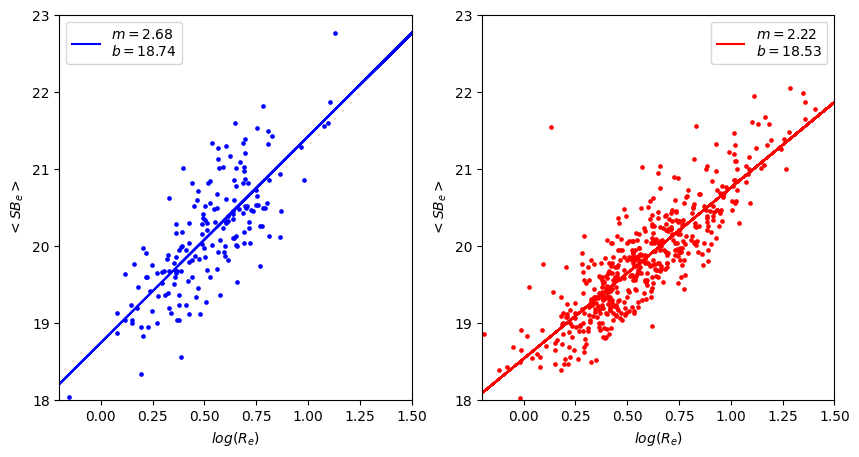

In [30]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(df_s['log_re'], df_s['<SBe>'],s=5.5,c='blue')
ax[1].scatter(df_e['log_re'], df_e['<SBe>'],s=5.5,c='red')

#Linear fits
ax[0].plot(df_s['log_dn_re'], df_s['log_dn_re']*slope_s+int_s, c="blue",
        label=r"$m=$"f"{slope_s:.2f}\n"r"$b=$"f"{int_s:.2f}"
           )
ax[0].legend()
ax[1].plot(df_e['log_dn_re'], df_e['log_dn_re']*slope_e+int_e, c="red",
        label=r"$m=$"f"{slope_e:.2f}\n"r"$b=$"f"{int_e:.2f}"
           )
ax[1].legend()

ax[0].set_xlabel(r"$log(R_{e})$")
ax[0].set_ylabel(r"$<SB_{e}>$")
ax[0].invert_yaxis()
ax[0].set_xlim(-0.2,1.5)
ax[0].set_ylim(18,23)

ax[1].set_xlabel(r"$log(R_{e})$")
ax[1].set_ylabel(r"$<SB_{e}>$")
ax[1].invert_yaxis()
ax[1].set_xlim(-0.2,1.5)
ax[1].set_ylim(18,23)


Text(0, 0.5, '$<SB_{e}>$')

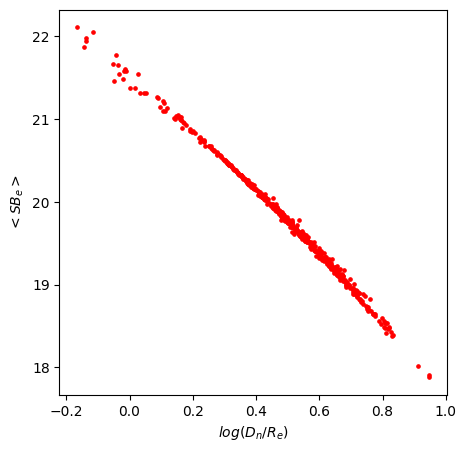

In [31]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(df_e['log_dn_re_deg'], df_e['<SBe>'],s=5.5,c='red')
ax.set_xlabel(r"$log(D_{n}/R_{e})$")
ax.set_ylabel(r"$<SB_{e}>$")

5) Graficar para tipos tempranos y realizar un ajuste lineal cuando sea posible:
    - $log(\sigma)$ vs $log(R_{e})$
    - $log(\sigma)$ vs $<SB_{e}>$
    - $M_{r}$ vs $log(\sigma)$
    - $M_{r}$ vs $log(R_{e} \sigma)$

In [36]:
df_e['r']

0     -22.819501
1     -21.459499
2     -22.042763
3     -22.098345
5     -21.977107
         ...    
755   -19.237545
756   -20.799160
757   -20.748035
758   -20.581800
759   -19.787669
Name: r, Length: 501, dtype: float64

In [68]:
def graph_proj(df,ax,x='log_sigma',y='log_re',scatt_c='red',lin_c='black'):
    slope,inter = linearfitter(df=df_e, x=x,y=y)
    ax.scatter(df[x],df[y] ,c=scatt_c,alpha=0.5, s=5.5)
    ax.plot(df[x],df[x]*slope+inter, c=lin_c,
            label=r"$m=$"f"{slope:.2f}\n" r"$b=$"f"{inter:.2f}\n"
        )
    labels = {"log_sigma":r"$log(\sigma)$", "log_re":r"$log(R_{e})$", "<SBe>":r"$<SB_{e}>$", 'log_re_s2':r"$log(R_{e}\sigma^{2})$",'r':r"$M_{r}$"}
    ax.set_xlabel(labels[x])
    ax.set_ylabel(labels[y])
    return ax


In [112]:
dfe = df_e[(df_e['log_sigma']<2.7)&(df_e['log_sigma']>2.0)]
dfe.reset_index(inplace=True)


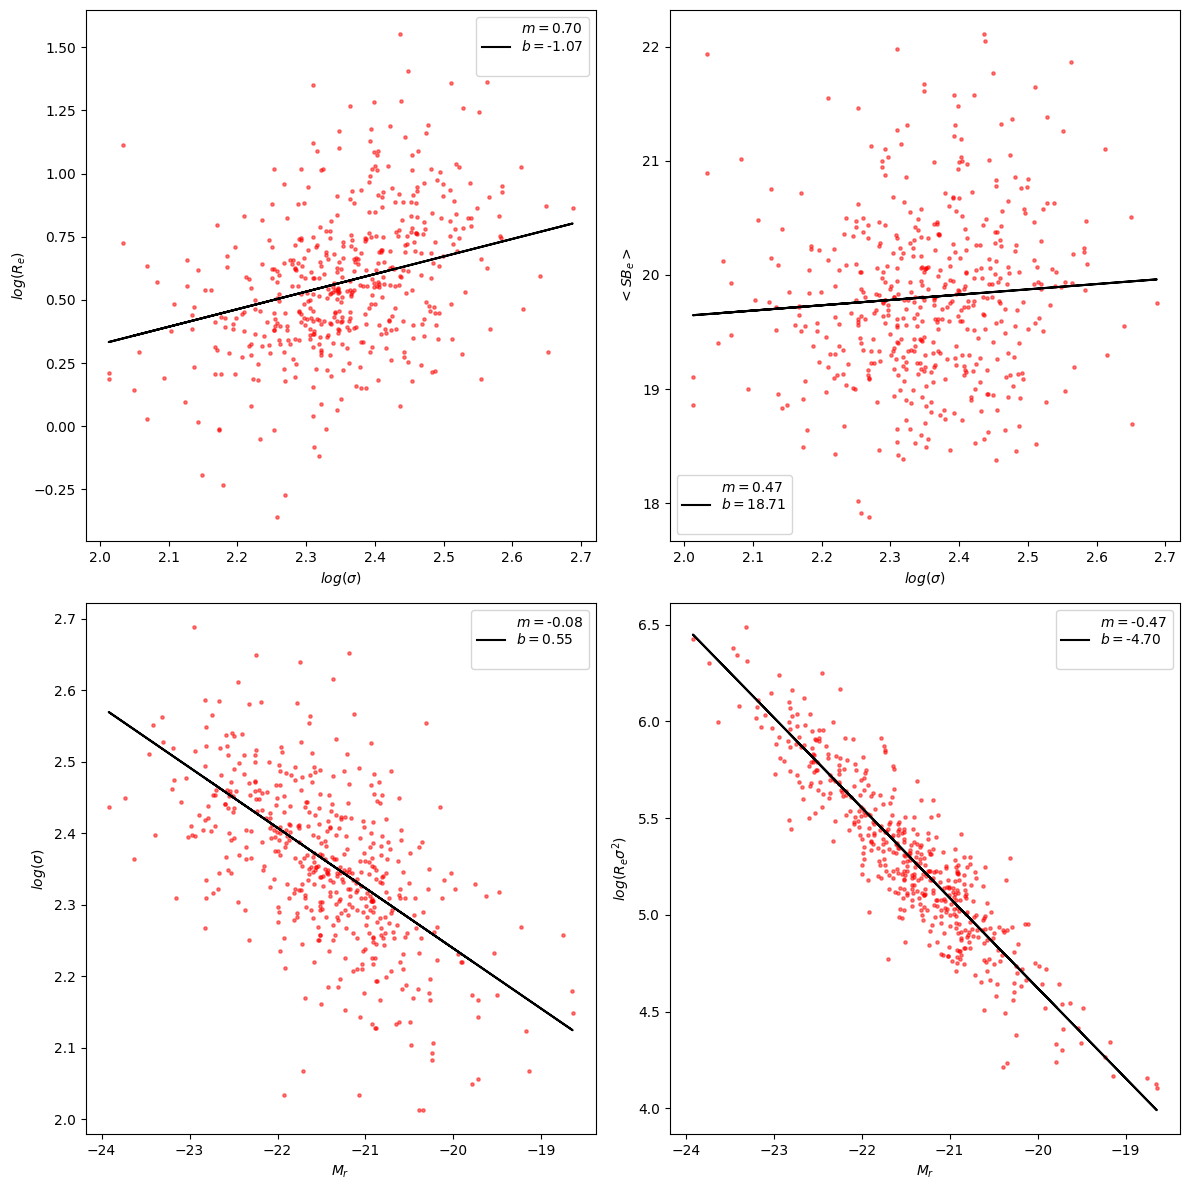

In [71]:
# solo me piden los tipos tempranos que estan en df_e
# Por otro lado me piden hacer ajustes lineales
fig,ax = plt.subplots(2,2,figsize=(12,12))
graph_proj(dfe,ax=ax[0,0])

graph_proj(dfe,ax=ax[0,1],y='<SBe>')
graph_proj(dfe,ax=ax[1,0],x='r',y='log_sigma')
graph_proj(dfe,ax=ax[1,1],x='r',y='log_re_s2')

for axes in ax.flat:
    axes.legend()
plt.tight_layout()

6) Graficar el plano fundamental en 3D: (log(Re), log(σ), log < SBe >)

Text(0.5, 0, 'log(SBe)')

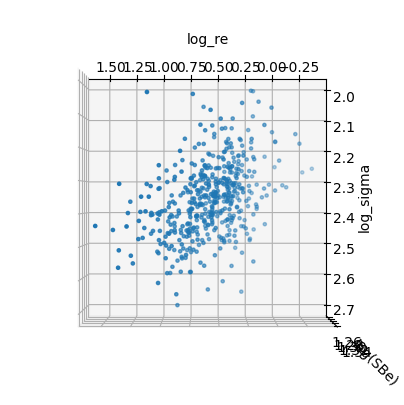

In [79]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection ='3d')
ax.scatter3D(dfe['log_re'],dfe['log_sigma'],np.log10(dfe['<SBe>']),s=5.5)
ax.view_init(elev=90, azim=90, roll=0) #0,90 log_re log_sbe ; 90,90 log_re log_sigma
ax.set_xlabel('log_re')
ax.set_ylabel('log_sigma')
ax.set_zlabel('log(SBe)')

# Fitting plano fundamental

- La ecuacion escalar de un plano es la siguiente:
$$a(x-x_{0})+b(y-y_{0})+c(z-z_{0})=0$$

- Donde el vector normal al mismo esta dado por: $n=(a,b,c)$

- Reordenando la ecuacion, la expresamos en la forma mas comun para uso con algoritmos:
$$ax+by+cz-[ax_{0}+by_{0}+cz_{0}]$$
$$z=f(x,y)=\frac{[ax_{0}+by_{0}+cz_{0}]}{c}-\frac{a}{c}x -\frac{b}{c}y$$

- La funcion que voy a programar para hacer este fitting seria la siguiente:
$$f(x,y,z,a,b,c)=\frac{[ax_{0}+by_{0}+cz_{0}]}{c}-\frac{a}{c}x -\frac{b}{c}y$$

In [146]:
def ffit(xy,a,b,c):
    indx = 0
    x0=np.array(dfe['log_re'])[indx]
    y0=np.array(dfe['log_sigma'])[indx]
    z0=np.log10(dfe['<SBe>'])[indx]
    x,y=xy
    d = a*x0+b*y0+c*z0
    return (d-a*x-b*y)/c

In [147]:
popt, pcov = curve_fit(ffit, (dfe['log_re'], dfe['log_sigma']), np.log10(dfe['<SBe>']))

In [150]:
np.max(np.log10(dfe['<SBe>']))

1.344588742578714

In [148]:
# Vector normal

indx = 0
x0=np.array(dfe['log_re'])[indx]
y0=np.array(dfe['log_sigma'])[indx]
z0=np.log10(dfe['<SBe>'])[indx]
# (x0,y0,z0)
popt

array([-0.21542737,  0.16808469,  4.17275954])

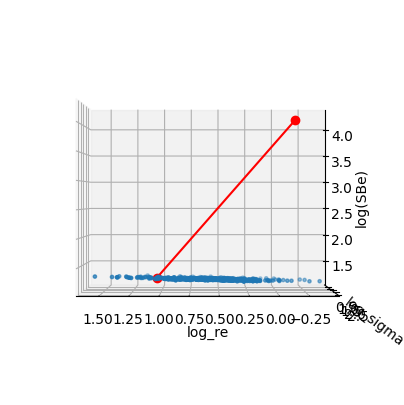

In [149]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection ='3d')
ax.scatter3D(dfe['log_re'],dfe['log_sigma'],np.log10(dfe['<SBe>']),s=5.5)
ax.view_init(elev=0, azim=90, roll=0) #0,90 log_re log_sbe ; 90,90 log_re log_sigma
ax.set_xlabel('log_re')
ax.set_ylabel('log_sigma')
ax.set_zlabel('log(SBe)')
ax.plot((x0,popt[0]),(y0,popt[1]),(z0,popt[2]),c='red',marker='o')

# Quiz de Preguntas 

- Las galaxias espirales tienen estrellas de Población I
    - Poblacion I: Corresponde a estrellas jovenes, azules y ricas en metales.Ubicadas principalmente en los brazos de las galaxias espirales.
    - Poblacion II: Son estrellas Rojas viejas, y pobres en metales. Se encuentran en el bulbo de las galaxias.
    - Respuesta: Verdadero

- La clasificación morfológica de Hubble da información de la verdadera forma de las galaxias.

    - La clasificacion de Hubble revela morfologia de una galaxia en el espectro optico visible. Sin embargo las galaxias poseen otras caracteristicas visibles en otras longitudes de onda.
    - Proyectos como Galaxy Zoo, clasifican las galaxias en el optico principalmente en galaxias S y E. Pero ya en el practico 2 habiamos visto otras formas de clasificar las galaxias como el indice de concentracion C, magnitud u-r, frac deV.
    - Separar las galaxias en el optico o utilizando alguno de las otras propiedades no siempre arroja el mismo resultado.
    - Respuesta: Falso, el sistema de Hubble da informacion de como son las galaxias en el optico, aunque a veces encuentra limitaciones debidas a que tan difusa es la imagen. Hay otros metodos para clasificar galaxias.

- Las galaxias elípticas tienen masas del orden de:
    - Masas E: $(10^{7} - 10^{13})M_{sun}$ otra Fuente: $(10^{5}-10^{13})M_{sun}$
    - Masas S:$(10^{9} - 10^{12})M_{sun}$ otra Fuente: $(10^{9}-4 \times 10^{11})M_{sun}$
    - Respuesta: 10^5 a 10^11

- El indice de concentración C separa a las galaxias en:
    - Respuesta: Tempranas y Tardias

- El diagrama color-magnitud distingue poblaciones de galaxias:
    - Rojas y azules (Secuencia Roja y Nube azul)

- La clasificación espectral de las galaxias nos da información en lo que respecta a la población estelar de sus subsistemas. Un espectro integrado de toda una galaxia resulta de la composición individual de sus estrellas y de la absorción del medio interestelar.
    - Respuesta: Verdadero

- Los discos y los bulbos se diferencian por su contenido en metales. Los discos contribuyen con supernovas tipo I, las cuales se hallan asociadas a estrellas jóvenes y masivas, las cuales enriquecen al medio intergaláctico.
    - Las supernovas de tipo I tienen una subclasificacion en tres tipos de supernova:
    - Tipo Ia: Debidas a implosion de estrellas enanas blancas cuando estas sobrepasan el limite de masa de Chandrasekar. Este tipo de Supernovas puede darse en cualquier tipo de galaxia ya que su progenitora es una estrella vieja.
    - Tipo Ib,c (Y tambien Supernovas de tipo II): Ocurren en galaxias espirales e irregulares donde predominan las estrellas azules y vinculadas a una poblacion estelar joven. Estas supernovas son la etapa final de las estrellas mas jovenes y masivas.
    - Respuesta: Falso, aca voy a asumir que la pregunta se refiere a la supernova de tipo Ia, la cual es la mas caracteristica y que se utiliza como *standard candle*

- La corrección K es mayor en galaxias elípticas y mayor en los filtros del infrarrojo.
    - La correccion K es mayor entre mas alejada este la galaxia del rest-frame en terminos de redshift.
    - Respuesta: Falso

- La tasa de formación estelar especifica permite separar a las galaxias en:
    - La sSFR es el cociente entre la SFR y masa de la galaxia. Las galaxias formadoras de estrellas son menos masivas las cuales son las espirales o irregulares. Las galaxias con menor sSFR son las elipticas, que son las mas masivas y con baja SFR.
    - Respuesta: las dos primeras opciones son correctas

- En el diagrama de la tasa de formación vs la masa estelar, la mayoría de la masa está en la secuencia principal.

- El quiebre a 4000 Å se debe a la superposición de muchas líneas de absorción metálicas, originadas en las atmósferas de estrellas frías. Por eso, el quiebre a 4000 Å es muy intenso en galaxias de tipo tardío y débil o inexistente en galaxias de tipo temprano.
    - Respuesta: Verdadero

- En el diagrama de la tasa de formación vs la masa estelar, la mayoría de la masa está en la secuencia principal.

- La masa estelar y la metalicidad están fuertemente relacionadas en galaxias con formación estelar, donde las galaxias máss masivas.
    - En el grafico de Tremonti 2004 se ve que a mayor masa mayor metalicidad (en fase gaseosa)
    - Respuesta: muestran metalicidades mayores que galaxias menos masivas.

